In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
# Load the dataset
diabetes_dataset = load_diabetes()

# Creating a DataFrame
df = pd.DataFrame(data=diabetes_dataset.data, columns=diabetes_dataset.feature_names)

df['target'] = diabetes_dataset.target

X=df.drop('target',axis=1)
y=df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  #Fit the data and transfrom the data
X_test_scaled = scaler.transform(X_test)  #Just transfrom the data since it is testing one 


In [11]:
#Linear Regression without regularisation
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
lr_predicted=lr.predict(X_test_scaled)
lr_mse=mean_squared_error(lr_predicted,y_test)
print("The Mean square error for Linear Regression without regularisation is ",lr_mse)

lasso=Lasso(alpha=1.0)
lasso.fit(X_train_scaled,y_train)
lasso_predicted=lasso.predict(X_test_scaled)
lasso_mse=mean_squared_error(lasso_predicted,y_test)
print("The Mean square error for Lasso Regularisation is ",lasso_mse)

ridge=Ridge(alpha=1)
ridge.fit(X_train_scaled,y_train)
ridge_predicted=ridge.predict(X_test_scaled)
ridge_mse=mean_squared_error(ridge_predicted,y_test)
print("The Mean square error for Ridge Regularisation is" ,ridge_mse)

The Mean square error for Linear Regression without regularisation is  2900.193628493482
The Mean square error for Lasso Regularisation is  2824.568094049959
The Mean square error for Ridge Regularisation is 2892.014565750171


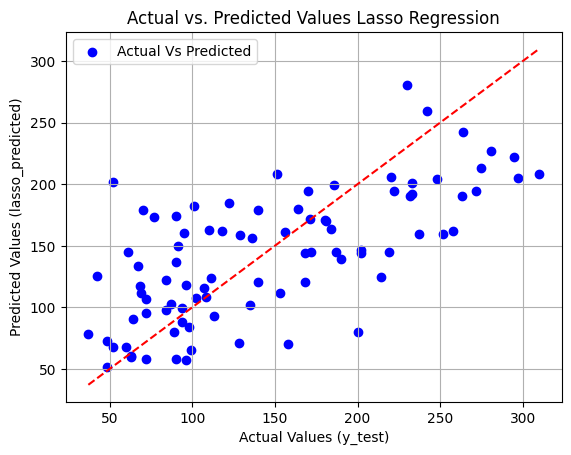

In [12]:
plt.scatter(y_test,lasso_predicted,color='blue',label='Actual Vs Predicted')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--')

plt.title('Actual vs. Predicted Values Lasso Regression')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (lasso_predicted)')
plt.legend()
plt.grid(True)
plt.show()


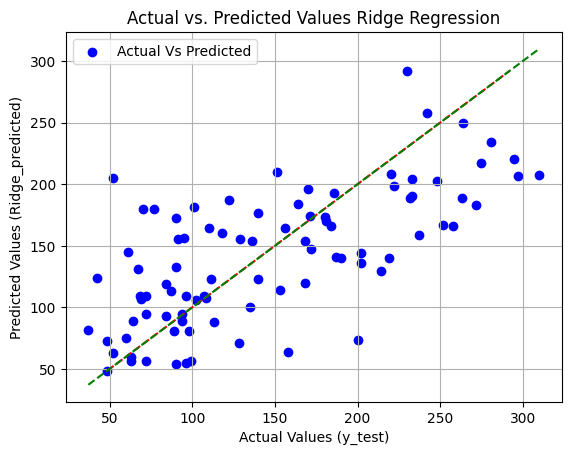

In [15]:
plt.scatter(y_test,ridge_predicted,color='blue',label='Actual Vs Predicted')

plt.plot([min(ridge_predicted),max(ridge_predicted)],[min(ridge_predicted),max(ridge_predicted)],color='red',linestyle='--')

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='green',linestyle='--')

plt.title('Actual vs. Predicted Values Ridge Regression')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (Ridge_predicted)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Gradent Descent 
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

X = df.drop("target", axis=1).values
y = df["target"].values.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones for the bias (intercept)
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Gradient Descent function
def linear_regression_gd(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))   # start with all weights = 0

    for i in range(iterations):
        predictions = X.dot(theta)         # y_hat
        errors = predictions - y           # difference from real y
        gradient = (1/m) * X.T.dot(errors) # slope direction
        theta = theta - learning_rate * gradient  # update weights

    return theta

# Train model
theta = linear_regression_gd(X_train, y_train, learning_rate=0.1, iterations=1000)

# Predictions
y_pred = X_test.dot(theta)

# Error
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)


Test MSE: 2889.924284265721
